# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Moch. Ichwan Alif Kurniawan
- **Email:** Ichwanalif55@gmail.com
- **ID Dicoding:** mc378d5y1720

## Menentukan Pertanyaan Bisnis

- Bagaimana performa peminjaman dalam 2 tahun tearkhir
- Kapan Musim peminjaman tertinggi dan terendah
- berapa total jumlah peminjaman setiap harinya
- Berapa persen total user umum dan ter-registrasi
- berapa rata-rata waktu peminjaman di hari libur (bukan weekend)

## Import Semua Packages/Library yang Digunakan

In [2]:
# prompt: import pandas, import numpy, import scipy, import matplotlib, import seaborn, import stremlit

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

## Data Wrangling

### Gathering Data

In [113]:
Day_df=pd.read_csv("data/day.csv",delimiter=',')
Hour_df=pd.read_csv("data/hour.csv", delimiter=',')

#### Menampilkan data day.csv

In [114]:
Day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


#### Menampilkan data hour.csv

In [115]:
Hour_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


**Insight:**
- Table Day menampung data sebanyak 732 hari
- Table Hour menampung data sebanyak 17380 jam

### Assessing Data

### Menilai data Day_df

##### Mencaritahu tipe data

In [116]:
Day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### mencari missing value di day.csv

In [117]:
Day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Mengecek duplikasi di Day_df

In [119]:
Day_df.duplicated().sum()

np.int64(0)

#### Deskripsi dari Data Day_df

In [118]:
Day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai dataset Hour_df

##### Mencaritahu tipe data

In [112]:
Hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

### mencari missing value di hour.csv

In [120]:
Hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Mengecek duplikasi di hour.csv

In [121]:
Hour_df.duplicated().sum()

np.int64(0)

### Deskrpsi dari Dataset hour.csv

In [122]:
Hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak Terdapat missing value di table Day, dan table Hour
- Tidak terdapat baris yang sama di kedua table
- kolom dteday harusnya mengunakan type date
- Value dari season harus sesuai dengan nama musim
- Value dari weekdays harus sesuai dengan nama hari dalam seminggu

### Cleaning Data

#### Membersihkan data day.csv

#### Menghilangkan Inacurate Value

#### Merubah musim menjadi nama musim

In [123]:
musim_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
Day_df["season_label"] = Day_df["season"].map(musim_labels)

#### Merubah hari menjadi nama hari dalam seminggu

In [124]:
hari_dict = {
    0: "Minggu",
    1: "Senin",
    2: "Selasa",
    3: "Rabu",
    4: "Kamis",
    5: "Jumat",
    6: "Sabtu"
}
# mapping
Day_df["weekday"] = Day_df["weekday"].map(hari_dict)

#### merubah type data column dteday menjadi datetime

In [125]:
dateColumn = ["dteday"]
for column in dateColumn:
    Day_df[column] = pd.to_datetime(Day_df[column])
    Hour_df[column] = pd.to_datetime(Hour_df[column])


**Insight:**
- Merubah type data dteday menjadi datetime di kedua tabel
- Mapping column season agar sesuai nama musim
- Mapping colum weekday agar sesuai nama hari dalam seminggu

## Exploratory Data Analysis (EDA)

### Explore Data Day_df

#### mencari tahu total penjualan dari tahun 2011 dan 2012

In [126]:
performa_tahunan=Day_df.groupby("yr")["cnt"].sum()
totalPenjualan_2011=performa_tahunan[0]
totalPenjualan_2012=performa_tahunan[1]
print (f"Total penjualan di tahun 2011 = {totalPenjualan_2011}")
print (f"Total penjualan di tahun 2012 = {totalPenjualan_2012}")

Total penjualan di tahun 2011 = 1243103
Total penjualan di tahun 2012 = 2049576


#### Mencaritahu total setiap musimnya

In [127]:
musim_rental = Day_df.groupby("season")["cnt"].mean()
musim_total = Day_df.groupby("season")["cnt"].sum()

total_peminjaman_musim = musim_total.to_dict()
rata_rata_peminjaman_musim = musim_rental.to_dict()

tabel_musim = pd.DataFrame({
    "Total Peminjaman": total_peminjaman_musim,
    "Rata-rata Peminjaman": rata_rata_peminjaman_musim
})
tabel_musim

,Total Peminjaman,Rata-rata Peminjaman
1,471348,2604.132597
2,918589,4992.331522
3,1061129,5644.303191
4,841613,4728.162921


#### Mencaritahu total setiap harinya

In [134]:
# menghitung total peminjaman dalam setiap hari
totalHarian = Day_df.groupby("weekday")["cnt"].sum()
totalHoliday = Day_df.groupby("holiday")["cnt"].sum()

# simpan dalam bentuk variabel
totalPeminjamanHarian = totalHarian.to_dict()
# Tampilkan dalam bentuk tabel
tabelHarian = pd.DataFrame({
    "Total Peminjaman Harian": totalPeminjamanHarian.values()
})
tabelHarian

,Total Peminjaman Harian
0,487790
1,485395
2,444027
3,473048
4,477807
5,469109
6,455503


### Menacari hari terbanyak dan tersedikit

In [130]:
totalPeminjamanTerbanyak = max(totalPeminjamanHarian.values())
totalPeminjamanTersedikit = min(totalPeminjamanHarian.values())
hari_terbanyak = [kunci for kunci, nilai in totalPeminjamanHarian.items() if nilai == totalPeminjamanTerbanyak]
hari_tersedikit = [kunci for kunci, nilai in totalPeminjamanHarian.items() if nilai == totalPeminjamanTersedikit]

totalPeminjamanTerbanyak, hari_terbanyak[0], totalPeminjamanTersedikit, hari_tersedikit[0]

(487790, 'Jumat', 444027, 'Minggu')

#### Mengeksplorasi persentase jumlah user

#### Mengetahui persentase user Casual

In [91]:
persentase_casual = (Day_df["casual"].sum() / Day_df["cnt"].sum()) * 100
f"{persentase_casual:.2f}%"

'18.83%'

#### Mengetahui persentase user Registered

In [49]:
persentase_registered = (Day_df["registered"].sum() / Day_df["cnt"].sum()) * 100
f"{persentase_registered:.2f}%"

'81.17%'

**Insight:**
- Total penjualan terbanyak, terjadi di tahun 2012
- Peminjaman terbanyak terjadi musim gugur dengan rata-rata perhari 5644.3 per-hari
- Musim dengan peminjaman paling sedikit terdapat di musim semi dengan rata-rata 2604 per-hari
- Total peminjaman terbanyak = 487790 pada hari Jumat
- Total peminjaman tesedikit = 444027 pada hari Minggu
- Jumlah pelanggan didominasi oleh pelanggan yang sudah ter-registrasi yakni 81.83% sisanya merupakan pelanggan umum dengan persentase 18.17%

### Explore Data Hour_df

In [104]:
libur_non_weekend = Hour_df[(Hour_df["holiday"] == 1) & (Hour_df["workingday"] == 0)]
total_Pemakaian_Holiday = libur_non_weekend.groupby("hr")["cnt"].mean().round(0).astype(int)
total_Pemakaian_Holiday

hr
0      57
1      39
2      25
3      12
4       6
5      11
6      28
7      82
8     171
9     171
10    203
11    249
12    287
13    299
14    286
15    265
16    272
17    293
18    269
19    222
20    178
21    145
22    109
23     58
Name: cnt, dtype: int64

**Insight:**
- Peminjaman terbanyak terjadi di jam 13:00, sebanyak 6269
- Peminjaman terendah terjadi di jam 04:00, senyak 4 buah

## Visualization & Explanatory Analysis

### Pertanyaan 1:

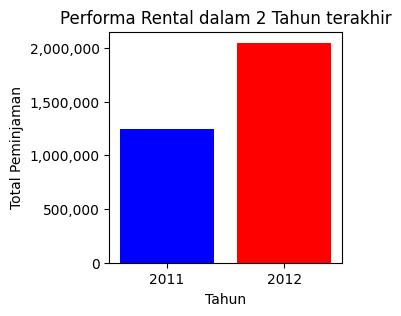

In [90]:
# 1. Visualisasi Performa Rental dalam 2 Tahun
performa_tahunan = Day_df.groupby("yr")["cnt"].sum().astype(int)
plt.figure(figsize=(3, 3))
plt.bar(["2011", "2012"], performa_tahunan, color=['blue', 'red'])
plt.xlabel("Tahun")
plt.ylabel("Total Peminjaman")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.title("Performa Rental dalam 2 Tahun terakhir")
plt.show()

**Insight:**
- Peminjaman tertinggi terjadi ditahun 2012
- Terjadi peningkatan sebanyak 8 juta unit yang dipinjam dari tahun sebelumnya

### Pertanyaan 2:

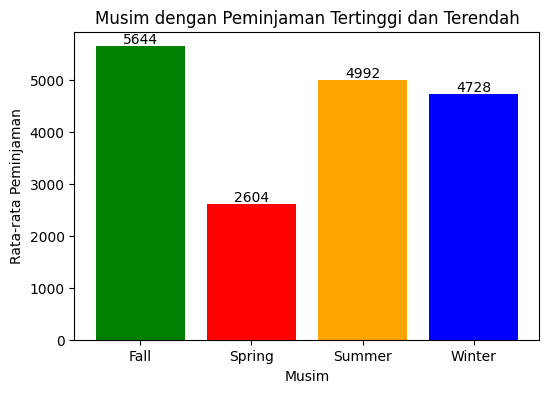

In [56]:
# 2. Visualisasi Musim Peminjaman Tertinggi dan Terendah
musim_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
Day_df["season_label"] = Day_df["season"].map(musim_labels)
musim_rental = Day_df.groupby("season_label")["cnt"].mean()

plt.figure(figsize=(6, 4))
bars = plt.bar(musim_rental.index, musim_rental, color=['green', 'red', 'orange', 'blue'])
plt.xlabel("Musim")
plt.ylabel("Rata-rata Peminjaman")
plt.title("Musim dengan Peminjaman Tertinggi dan Terendah")
# Menambahkan label pada batang diagram
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')
plt.show()

**Insight:**
- Musim peminjaman tertinggi terjadi di Musim Dingin
- Musim peminjaman terendah terjadi di Musim Semi
- Unutk Musim panas ke musim dingin terjadi penurunan sebanyak 264 jumlah peminjaman

### Pertanyaan 3:

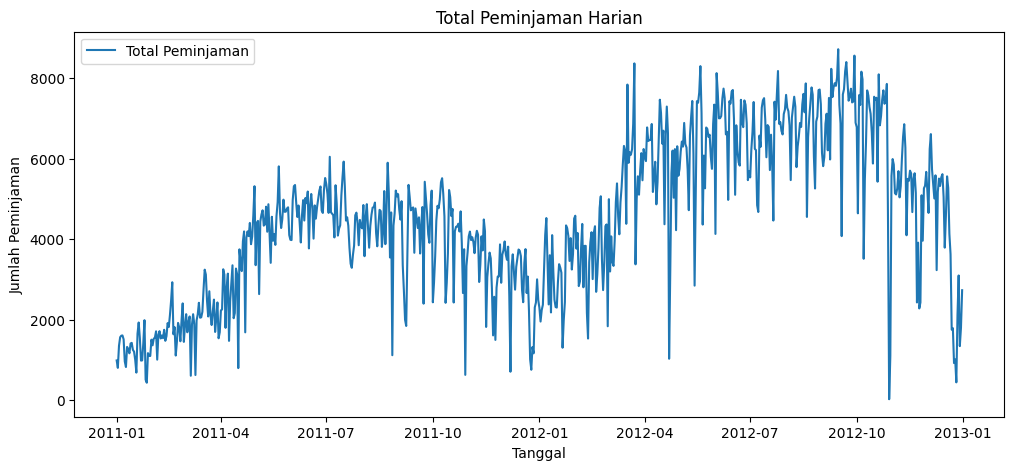

In [101]:
# 3. Total jumlah peminjaman setiap harinya
plt.figure(figsize=(12, 5))
sns.lineplot(data=Day_df, x="dteday", y="cnt", label="Total Peminjaman")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Peminjaman")
plt.title("Total Peminjaman Harian")
plt.show()

**Insight:**

- Terjadi tren kenaikan di bulan Januari sampai Juli 2011
- Penurunan terjadi di paruh kedua 2011
- Januari 2012 sampai bulan Oktober 2012 terjandi kenaikan secara konsisten
- Penurunan jumlah peminjaman terjadi di bulan November sampai akhir Desember

### Pertanyaan 4:

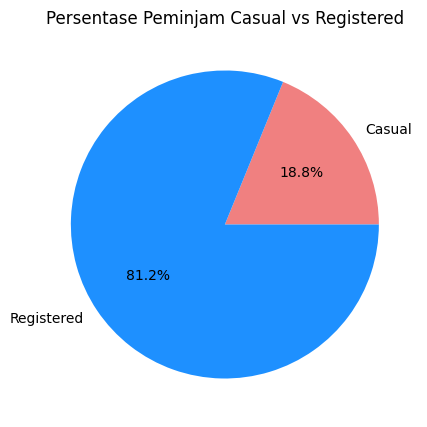

In [53]:
# 4. Persentase user umum dan ter-registrasi
persentase_casual = (Day_df["casual"].sum() / Day_df["cnt"].sum()) * 100
persentase_registered = (Day_df["registered"].sum() / Day_df["cnt"].sum()) * 100
plt.figure(figsize=(5, 5))
plt.pie([persentase_casual, persentase_registered], labels=["Casual", "Registered"],
        autopct="%1.1f%%", colors=['lightcoral', 'dodgerblue'])
plt.title("Persentase Peminjam Casual vs Registered")
plt.show()

**Insight:**

- Lebih dari 81.2% penggunan sudah teregistrasi
- Jumlah user casual hanyak mencangkup 18.8% kurang dari seperlima total keseluruhan user

### Pertanyaan 5:

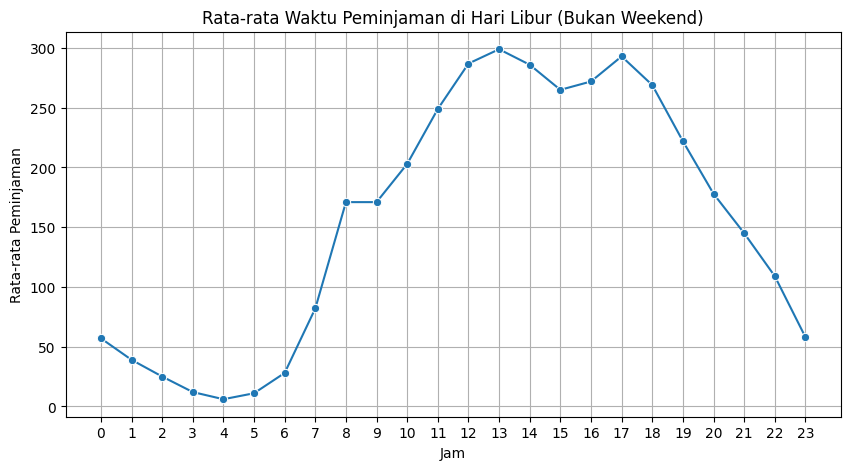

In [132]:
# 5. Rata-rata waktu peminjaman di hari libur (bukan weekend)
libur_non_weekend = Hour_df[(Hour_df["holiday"] == 1) & (Hour_df["workingday"] == 0)]
rata_rata_libur_non_weekend = libur_non_weekend.groupby("hr")["cnt"].mean().round(0).astype(int)
plt.figure(figsize=(10, 5))
sns.lineplot(x=rata_rata_libur_non_weekend.index, y=rata_rata_libur_non_weekend.values, marker="o")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Peminjaman")
plt.title("Rata-rata Waktu Peminjaman di Hari Libur (Bukan Weekend)")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

**Insight:**

- Terjadi kenaikan peminjam di jam mulai beraktivitas, mulai dari jam 5 pagi sampai 13 siang
- Penurunan terjadi dari jam 13 siang sampai 15 sore
- Kenaikan tren kembali terjadi dari jam 15 sore sampai 17 sore, yang merupakan jam orang-orang ber-aktivitas
- Penurunan treen terus terjadi mulai jam 17 sore, karena orang-orang mulai berada di rumah.  

## Analisis Lanjutan (Opsional)

## Conclusion

### Kesimpulan Pertanyaan 1

- Pada tahun 2011 terdapat 1.243.103 pengguna, jumlah ini merupakan nilai gabungan dari jumlah user casual dan juga user yang ter-registrasi
- Tahun 2012 terdapat 2.049.576 pengguna, hampir 2 kali lipat dari tahun sebelumnya. menunjukkan minat pengguna yang tinggi pada tahun ini
- kenaikan yang tajam pada jumlah pengguna menandakan semakin dikenalnya Bike Sharing System kepada khalayak ramai.

### saran Pertanyaan 1

- Tingkatkan lagi pemasarannya, atau bila perlu berikan juga reward kepada pengguna aktif agar lebih sering menggunakan Bike Sharing System

### Kesimpulan Pertanyaan 2

In [54]:
tabel_musim

,Total Peminjaman,Rata-rata Peminjaman
Fall,1061129,5644.303191
Spring,471348,2604.132597
Summer,918589,4992.331522
Winter,841613,4728.162921


- Terlihat kalau di Musim Gugur, jumlah pengguna merupakan yang paling tinggi, dengan total 1.061.129 kali.
pada saat daun-daun mulai berguguran, dan cuaca mulai mendingin, membuat waktu yang pas untuk bersepeda
- Musim panas merupakan musim terbanyak kedua, dengan total 918.589 kali peminjaman. Musim ini merupakan musim liburan, sehingga tidak heran memiliki jumlah pengguna yang cukup banyak
- Musim dingin merupakan musim terbanyak ketiga, dengan total 841.613 kali. menunjukkan kurangnya minat pengguna untuk keluar ruangan pada musim dingin
- Musim Semi merupakan musim paling sedikit pengguna, dengan total hanya 471348 kali peminjaman. menunjukkan sedikitnya minat pengguna untuk bersepeda di musim ini.

### Saran Pertanyaan 2

- Berikan paket, atau potongan harga untuk mendorong jumlah pengguna pada musim semi.
- Pada Musim dinggin atau gugur, bisa berikan sarung tangan gratis agar pengguna semakin nyaman dengan pelayanan yang diberikan dan berimbas pada naiknya jumlah penguna pada musim tersebut.

### Kesimpulan Pertanyaan 3

- Terjadi tren kenaikan di bulan Januari sampai Juli 2011
- Penurunan terjadi di paruh kedua 2011
- Januari 2012 sampai bulan Oktober 2012 terjandi kenaikan secara konsisten, yang merupakan angka tertinggi, hingga mencapai angka 9000 peminjaman
- Penurunan jumlah peminjaman terjadi di bulan November sampai akhir Desember
- Berdasarkan eksplorasi, diketahui kalau hari peminjaman tertinggi ada pada hari Jumat sebanyak 487790
- hari peminjaman tersedikit berada id hari Minggu sebanyak 444027

### Saran pertanyaan 3

- Berikan pelayanan yang menarik agar tetap menjaga ketertarikan pegguna terhadap bike sharing system

### Kesimpulan pertanyaan 4

- Lebih dari 81.2% penggunan sudah teregistrasi, membuktikan kalau Bike sharing System sudah diterima masyarakat umum
- Jumlah user casual hanyak mencangkup 18.8% kurang dari seperlima total keseluruhan user, Berasal dari pengguna yang hanya menggunakan 1 kali atau 2 kali

### Saran pertanyaan 4

- Tambahkan iklan agar lebih banyak pengguna yang memakai Bike Sharing System
- Berikan Benefit untuk Pengguna yang Pertama kali Registrasi, agar makin tinggi persentase pengguna yang ter-registrasi

### Kesimpulan pertanyaan 5

- Jam aktivitas merupakan jam paling banyak pengguna yang aktif, mulai dari jam 5 pagi sampai jam 5 sore
- sebelum jam 5 dan setelah jam 5 merupakan jam paling sedikit aktivitas

### Saran Pertanyaan 5

- tambahkan lampu depan pada sepeda agar pengguna nyaman memakai di malam hari